# SymPy Exercises

In [1]:
import sympy as sym
from sympy import init_session
init_session()

IPython console for SymPy 1.0 (Python 3.6.0-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


## Q1: Creating an expression

Create the expression:
$$f = x e^{-x} + x (1-x)$$
Then evaluate it for 
$$x = 0, 0.1, 0.2, 0.4, 0.8$$

In [2]:
from sympy import symbols
x, y, z = sym.symbols("x y z")
expr = x*exp(-x) + x*(1-x)
xval = [0, 0.1, 0.2, 0.4, 0.8]
for i in xval:
    print(expr.subs(x, i))

0
0.180483741803596
0.323746150615596
0.508128018414256
0.519463171293777


## Q2: Factoring a polynomial, and finding its roots

Factor $$x^{4} - 6 x^{3} + x^{2} + 24 x + 16$$

Then find its zeros.

In [3]:
solveset(x**4 - 6*x**3 + x**2 + 24*x + 16, x)

## Q3: Integratation and differentiation

Integrate the function:
$$
f = \sin(x) e^{-x}
$$

Then differentiate the result to see if you get back the original function

In [5]:
expr = integrate(sin(x)*exp(-x), x)
print(diff(expr, x))

exp(-x)*sin(x)


## Q4: Parsing an expression

Write a program that reads in a mathematical expression as a string (e.g., `"sin(2*pi*x)"`), converts it to a SymPy expression, and then evaluates it as needed.  

Have your program either make a plot of the entered function, or use the input function as the function to fit a dataset to using curvefit.

The following will be helpful:

`parse_expr()` will convert a string into a SymPy expression

In [28]:
from sympy.parsing.sympy_parser import parse_expr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
s = "cos(2*pi*x)"
a = parse_expr(s)
a

`sympy.lambdify()` will convert a SymPy expression into a function that is callable by python.  You can make it a numpy-compatible function too (this means, e.g., that any `sin()` in your SymPy expression will be evaluate using `np.sin()`)

<function <lambda> at 0x000000000966B6A8>


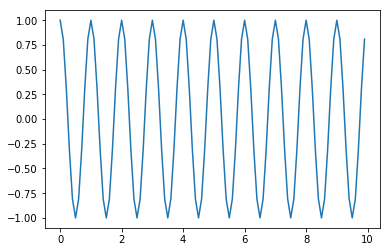

In [30]:
f = sym.lambdify(x, a, "numpy")
print (f)

xval = np.arange(0, 10, 0.1)
fun_val = []
for i in xval:
    fun_val.append(f(i))
    # print (f(i))
plt.plot(xval, fun_val)

In [19]:
f(1.0)

In [6]:
help(lambdify)

Help on function lambdify in module sympy.utilities.lambdify:

lambdify(args, expr, modules=None, printer=None, use_imps=True, dummify=True)
    Returns a lambda function for fast calculation of numerical values.
    
    If not specified differently by the user, SymPy functions are replaced as
    far as possible by either python-math, numpy (if available) or mpmath
    functions - exactly in this order. To change this behavior, the "modules"
    argument can be used. It accepts:
    
     - the strings "math", "mpmath", "numpy", "numexpr", "sympy"
     - any modules (e.g. math)
     - dictionaries that map names of sympy functions to arbitrary functions
     - lists that contain a mix of the arguments above, with higher priority
       given to entries appearing first.
    
    The default behavior is to substitute all arguments in the provided
    expression with dummy symbols. This allows for applied functions (e.g.
    f(t)) to be supplied as arguments. Call the function with dumm

## Q5: Units

SymPy can deal with physical units.  See:

http://docs.sympy.org/latest/modules/physics/units/quantities.html

Let's try this out.  Newton's 2nd law is
$$F = ma$$

Create a mass of 1 kg and an acceleration of 10 m/s$^2$, and compute the force, $F$, and express the result in Newtons.

Note: the `convert_to` function was added in SymPy 1.1, so if you are using an earlier version, you will need to divide by the target unit to do the conversion.